In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [3]:
df = pd.read_excel(r"C:\Users\paint\OneDrive\Desktop\klsfd\Walkability_TES_Temp_HOPEFULLYGOOD.xlsx")
df.head

<bound method NDFrame.head of         D2B_E8MIXA  D2A_EPHHM         D3B       D4A  D2A_Ranked  D2B_Ranked  \
0         0.662091   0.348912  115.981747    362.10           6          14   
1         0.554458   0.197047   80.145600    718.84           3          10   
2         0.000000   0.000000   24.272717    398.31           1           1   
3         0.553831   0.682830  141.604424    386.24          16          10   
4         0.459064   0.261472   65.307963    638.37           4           7   
...            ...        ...         ...       ...         ...         ...   
216221    0.509260   0.227711  132.387046 -99999.00           3           8   
216222    0.763468   0.678840   88.439590 -99999.00          16          18   
216223    0.696926   0.571550  156.876279 -99999.00          12          15   
216224    0.619125   0.743552    0.350579 -99999.00          17          12   
216225    0.316394   0.513854    0.234811 -99999.00          11           4   

        D3B_Ranked  D

In [4]:
gdf = gpd.read_file(r"C:\Users\paint\OneDrive\Desktop\klsfd\shapefile")

In [5]:
gdf.head()

,Join_Count,TARGET_FID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,...,_veg1800,_tot1800,GEOID_TEXT,Temp_Ranke,TES_Ranked,Pop_Densit,Density_Ca,Shape_Leng,Shape_Area,geometry
0,1,1,481130078254,481130078254,48,113,007825,4,206,"Dallas-Fort Worth, TX-OK",...,0.4363,0.6921,481130078254,1,18,5526.67,Moderate,3110.360820,297836.083090,"POLYGON ((-68983.316 1091325.734, -68981.266 1..."
1,1,2,481130078252,481130078252,48,113,007825,2,206,"Dallas-Fort Worth, TX-OK",...,0.4363,0.6921,481130078252,2,18,3394.27,Moderate,3519.469110,484945.146563,"POLYGON ((-68891.713 1090955.557, -68860.876 1..."
2,1,3,481130078253,481130078253,48,113,007825,3,206,"Dallas-Fort Worth, TX-OK",...,0.4759,0.8065,481130078253,2,18,3936.13,Moderate,1697.091802,106705.928129,"POLYGON ((-68078.32 1091181.799, -68077.077 10..."
3,1,4,481130078241,481130078241,48,113,007824,1,206,"Dallas-Fort Worth, TX-OK",...,0.5051,0.7259,481130078241,2,18,3899.78,Moderate,2922.609204,481828.430336,"POLYGON ((-68978.261 1090638.77, -68976.661 10..."
4,1,5,481130078242,481130078242,48,113,007824,2,206,"Dallas-Fort Worth, TX-OK",...,0.5051,0.7259,481130078242,2,18,2732.41,Low,3731.971773,687684.775181,"POLYGON ((-68980.363 1090202.6, -68965.203 109..."


In [6]:
gdf.columns

Index(['Join_Count', 'TARGET_FID', 'GEOID10', 'GEOID20', 'STATEFP', 'COUNTYFP',
       'TRACTCE', 'BLKGRPCE', 'CSA', 'CSA_Name', 'CBSA', 'CBSA_Name',
       'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr', 'TotPop', 'CountHU', 'HH',
       'Workers', 'D2B_E8MIXA', 'D2A_EPHHM', 'D3B', 'D4A', 'D2A_Ranked',
       'D2B_Ranked', 'D3B_Ranked', 'D4A_Ranked', 'NatWalkInd', 'OBJECTID_1',
       'walkabilit', 'X', 'Y', 'AverageTem', 'GEOID', 'place', 'state',
       'state_abbr', 'county', 'ua_name', 'ua_pop', 'congressio', 'cbg_pop',
       'acs_pop', 'land_area', 'biome', 'cnpysource', 'tc_goal', 'treecanopy',
       'tc_gap', 'priority_i', 'pctpoc', 'pctpocnorm', 'pctpov', 'pctpovnorm',
       'unemplrate', 'unemplnorm', 'dep_ratio', 'dep_perc', 'depratnorm',
       'linguistic', 'lingnorm', 'health_nor', 'temp_diff', 'temp_norm',
       'TreeEquity', 'tesctyscor', 'holc_grade', 'child_perc', 'seniorperc',
       'ej_disadva', 'rank', 'rankgrpsz', '_bld1200', '_veg1200', '_tot1200',
       '_bl

In [31]:
edagdf = gdf[['GEOID20', 'STATEFP', 'D2B_E8MIXA', 'D2A_EPHHM', 'D3B', 'D4A', 'D2A_Ranked', 'D2B_Ranked', 'D3B_Ranked', 'D4A_Ranked', 'NatWalkInd', 'AverageTem', 'acs_pop', 'land_area', 'TreeEquity', 'Temp_Ranke', 'TES_Ranked', 'Pop_Densit', 'Density_Ca', 'Shape_Leng', 'Shape_Area', 'geometry']].copy()

In [32]:
column_mapping = {
    'D2B_E8MIXA' : 'D2B_Employmentmix',
    'D2A_EPHHM' : 'D2A_Employhouseholdmix',
    'D3B' : 'D3B_Intersectiondensity',
    'D4A' : 'D4A_Proxtotransitstops',
    'AverageTem' : 'AveTemp',
    'acs_pop' : 'AmeCommunitySur_pop',
    'TreeEquity' : 'TreeEquityScore',
    'Temp_Ranke' : 'Temp_Ranked',
    'Pop_Densit' : 'Pop_Density',
    'Density_Ca' : 'Density_Category'
}

edagdf = edagdf.rename(columns = column_mapping)


In [33]:
edagdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 216224 entries, 0 to 216223
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   GEOID20                  216224 non-null  object  
 1   STATEFP                  216224 non-null  object  
 2   D2B_Employmentmix        216224 non-null  float64 
 3   D2A_Employhouseholdmix   216224 non-null  float64 
 4   D3B_Intersectiondensity  216224 non-null  float64 
 5   D4A_Proxtotransitstops   216224 non-null  float64 
 6   D2A_Ranked               216224 non-null  float64 
 7   D2B_Ranked               216224 non-null  float64 
 8   D3B_Ranked               216224 non-null  float64 
 9   D4A_Ranked               216224 non-null  float64 
 10  NatWalkInd               216224 non-null  float64 
 11  AveTemp                  216224 non-null  float64 
 12  AmeCommunitySur_pop      216224 non-null  float64 
 13  land_area                216224 non-

In [34]:
edagdf.head()

,GEOID20,STATEFP,D2B_Employmentmix,D2A_Employhouseholdmix,D3B_Intersectiondensity,D4A_Proxtotransitstops,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,...,AmeCommunitySur_pop,land_area,TreeEquityScore,Temp_Ranked,TES_Ranked,Pop_Density,Density_Category,Shape_Leng,Shape_Area,geometry
0,481130078254,48,0.662091,0.348912,115.981747,362.10,6.0,14.0,15.0,17.0,...,1646.0,0.7817,100.0,1,18,5526.67,Moderate,3110.360820,297836.083090,"POLYGON ((-68983.316 1091325.734, -68981.266 1..."
1,481130078252,48,0.554458,0.197047,80.145600,718.84,3.0,10.0,12.0,14.0,...,1646.0,0.7817,100.0,2,18,3394.27,Moderate,3519.469110,484945.146563,"POLYGON ((-68891.713 1090955.557, -68860.876 1..."
2,481130078253,48,-0.000000,0.000000,24.272717,398.31,1.0,1.0,7.0,17.0,...,420.0,0.1088,100.0,2,18,3936.13,Moderate,1697.091802,106705.928129,"POLYGON ((-68078.32 1091181.799, -68077.077 10..."
3,481130078241,48,0.553831,0.682830,141.604424,386.24,16.0,10.0,17.0,17.0,...,1879.0,1.1692,100.0,2,18,3899.78,Moderate,2922.609204,481828.430336,"POLYGON ((-68978.261 1090638.77, -68976.661 10..."
4,481130078242,48,0.459064,0.261472,65.307963,638.37,4.0,7.0,11.0,14.0,...,1879.0,1.1692,100.0,2,18,2732.41,Low,3731.971773,687684.775181,"POLYGON ((-68980.363 1090202.6, -68965.203 109..."


In [35]:
edagdf.describe()

,D2B_Employmentmix,D2A_Employhouseholdmix,D3B_Intersectiondensity,D4A_Proxtotransitstops,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,AveTemp,AmeCommunitySur_pop,land_area,TreeEquityScore,Temp_Ranked,TES_Ranked,Pop_Density,Shape_Leng,Shape_Area
count,216224.000000,216224.000000,216224.000000,216224.000000,216224.000000,216224.000000,216224.000000,216224.000000,216224.000000,216224.000000,216224.000000,216224.000000,216224.000000,216224.000000,216224.000000,216224.000000,2.162240e+05,2.162240e+05
mean,0.539309,0.504789,78.264720,-56552.206987,10.638241,10.637885,10.509994,7.712229,9.620095,29.459661,1009.296628,0.902714,60.518980,10.520234,9.215429,2466.764505,1.617091e+04,3.669124e+07
std,0.214156,0.221857,83.053723,49767.635675,5.689741,5.694190,5.757457,7.824485,4.348730,3.414950,896.783870,1.481722,40.457473,5.768066,6.735709,6302.255418,3.038838e+04,2.617005e+08
min,-0.000000,0.000000,0.000000,-99999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.976700,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.685713e+02,4.435890e+03
25%,0.407667,0.336275,13.306033,-99999.000000,6.000000,6.000000,6.000000,1.000000,6.000000,27.159975,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,3.274131e+03,5.015370e+05
50%,0.574741,0.518023,60.704516,-99999.000000,11.000000,11.000000,11.000000,1.000000,9.166667,29.141950,983.000000,0.432000,80.000000,11.000000,10.000000,898.360000,5.874087e+03,1.376649e+06
75%,0.703477,0.678158,116.500946,347.350000,16.000000,16.000000,15.000000,16.000000,13.333333,31.842450,1563.000000,1.104100,93.000000,16.000000,15.000000,2403.835000,1.601467e+04,9.533389e+06
max,0.993980,1.000000,5289.518414,1207.000000,20.000000,20.000000,20.000000,20.000000,20.000000,46.191800,18421.000000,50.672700,100.000000,21.000000,18.000000,290808.600000,1.203762e+06,1.950944e+10


In [36]:
edagdf.isnull().sum()

GEOID20                    0
STATEFP                    0
D2B_Employmentmix          0
D2A_Employhouseholdmix     0
D3B_Intersectiondensity    0
D4A_Proxtotransitstops     0
D2A_Ranked                 0
D2B_Ranked                 0
D3B_Ranked                 0
D4A_Ranked                 0
NatWalkInd                 0
AveTemp                    0
AmeCommunitySur_pop        0
land_area                  0
TreeEquityScore            0
Temp_Ranked                0
TES_Ranked                 0
Pop_Density                0
Density_Category           0
Shape_Leng                 0
Shape_Area                 0
geometry                   0
dtype: int64

In [37]:
edagdf['D4A_Proxtotransitstops'].value_counts()[-99999]

np.int64(122706)

In [38]:
edagdf['D4A_nulls'] = np.where(edagdf['D4A_Proxtotransitstops'] == -99999, 1, 0)

In [39]:
exclude = [15, 2, 72, 66, 69, 60, 78]
edagdf = edagdf.loc[~edagdf['STATEFP'].astype(int).isin(exclude)]
edagdf = edagdf.to_crs(4326)

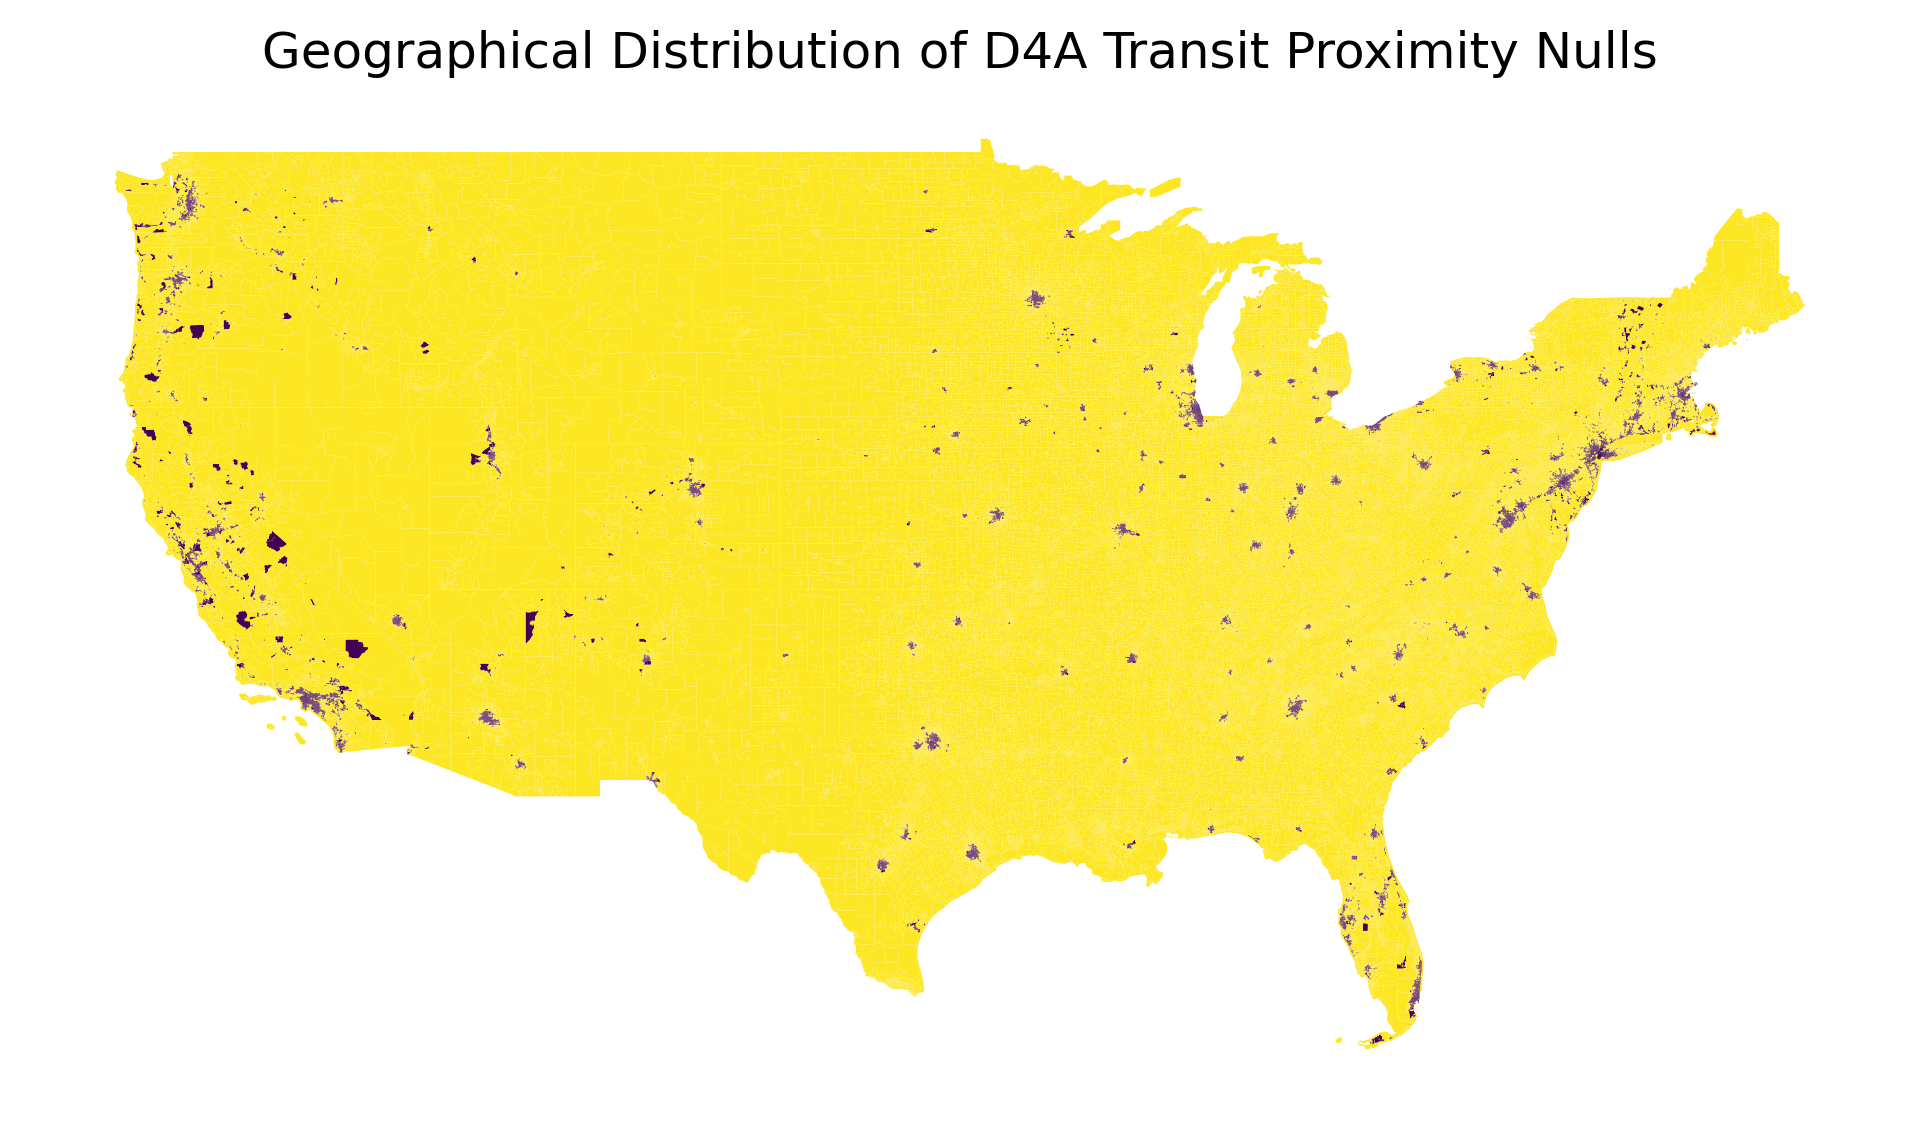

In [40]:
fig, ax1 = plt.subplots(figsize=(8,10), dpi=300)
edagdf.plot(ax=ax1, column='D4A_nulls')
ax1.set_title('Geographical Distribution of D4A Transit Proximity Nulls')
ax1.set_axis_off()

In [64]:
# replace -99999 with 5000 in order to get better correlation info
# df.loc[df["gender"] == "male", "gender"] = 1
edagdf.loc[edagdf['D4A_Proxtotransitstops'] == -99999, 'D4A_Proxtotransitstops'] = 5000

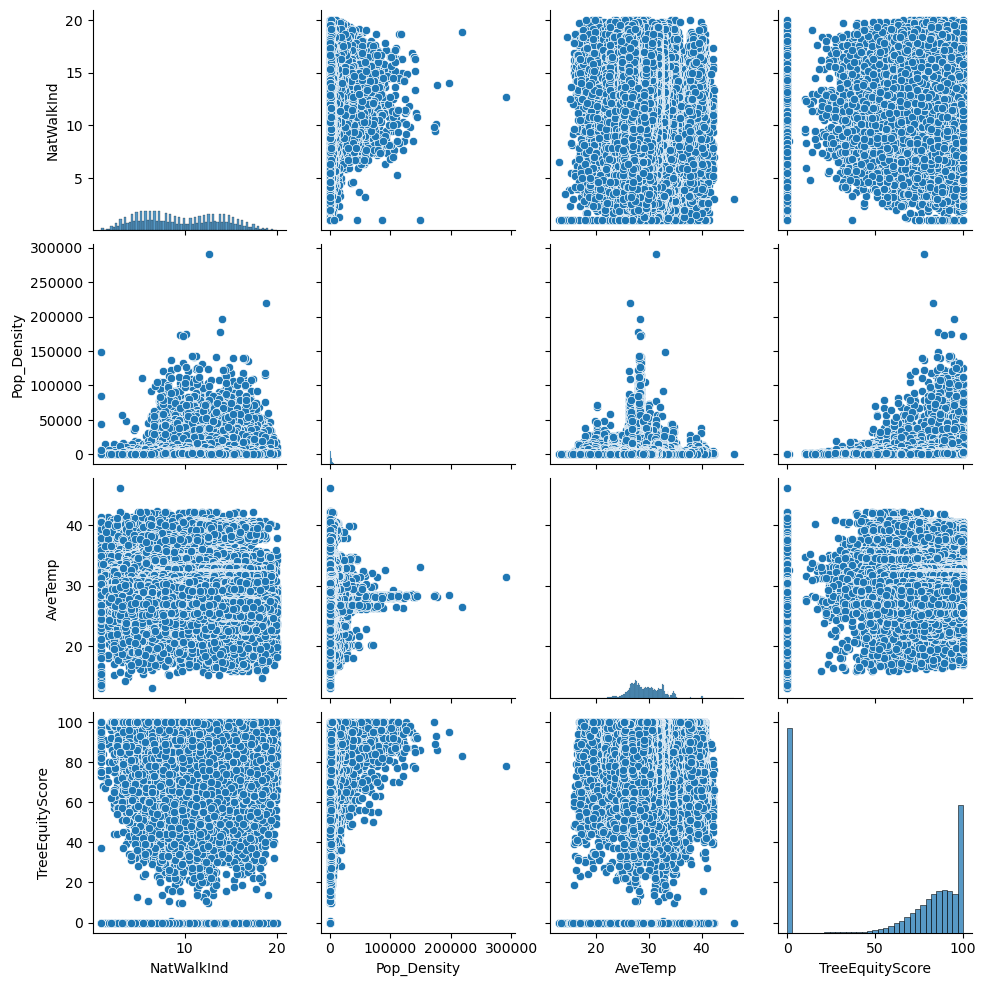

In [65]:
sns.pairplot(edagdf[['NatWalkInd', 'Pop_Density', 'AveTemp', 'TreeEquityScore']])

In [55]:
# using interquartile range for outliers in popdensity
quantile1 = edagdf['Pop_Density'].quantile(.25)
quantile3 = edagdf['Pop_Density'].quantile(.75)
IQR = quantile3 - quantile1

lowerbound = quantile1 - 1.5 * IQR
upperbound = quantile3 + 1.5 * IQR

outliers = edagdf.loc[(edagdf['Pop_Density'] < lowerbound) | (edagdf['Pop_Density'] > upperbound)]
outliers


,GEOID20,STATEFP,D2B_Employmentmix,D2A_Employhouseholdmix,D3B_Intersectiondensity,D4A_Proxtotransitstops,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,...,land_area,TreeEquityScore,Temp_Ranked,TES_Ranked,Pop_Density,Density_Category,Shape_Leng,Shape_Area,geometry,D4A_nulls
7,481130011022,48,0.611252,0.453538,83.349800,442.57,9.0,12.0,13.0,16.0,...,0.5095,100.0,2,18,6730.55,Moderate,2248.148479,258973.570993,"POLYGON ((-96.76153 32.81727, -96.76153 32.817...",0
11,481130115001,48,0.240643,0.110304,155.927003,352.71,2.0,3.0,18.0,17.0,...,0.7991,100.0,2,18,14024.43,Moderate,2628.841414,171703.731720,"POLYGON ((-96.74121 32.75819, -96.74116 32.758...",0
13,481130123013,48,0.476995,0.391234,103.680825,264.20,7.0,7.0,15.0,18.0,...,0.2609,92.0,2,15,6917.18,Moderate,2651.328236,258202.640000,"POLYGON ((-96.6897 32.81741, -96.68835 32.8179...",0
19,481130131042,48,0.126982,0.200925,75.089662,336.62,3.0,2.0,12.0,17.0,...,0.5381,93.0,2,15,9464.86,Moderate,2353.993901,184053.294670,"POLYGON ((-96.77509 32.88656, -96.77282 32.887...",0
34,481130152046,48,-0.000000,0.072537,78.426237,291.02,1.0,1.0,12.0,18.0,...,0.3919,85.0,1,12,7718.07,Moderate,2976.524659,319385.350452,"POLYGON ((-96.97693 32.78579, -96.97663 32.785...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215368,550250016041,55,0.254705,0.320098,77.604766,276.27,5.0,3.0,12.0,18.0,...,0.0445,94.0,17,16,17160.41,Moderate,942.969414,44521.952432,"POLYGON ((-89.39387 43.07787, -89.39327 43.078...",0
215372,550250016064,55,-0.000000,0.000000,154.416791,127.41,1.0,1.0,18.0,20.0,...,0.0503,82.0,16,11,48554.72,Moderate,1046.549631,50334.941796,"POLYGON ((-89.40082 43.07126, -89.40081 43.071...",0
215459,551010009042,55,0.528018,0.421736,61.840321,225.31,8.0,9.0,11.0,19.0,...,0.2614,70.0,19,8,7125.40,Moderate,2411.678597,167571.338300,"POLYGON ((-87.84229 42.68762, -87.84123 42.687...",0
215712,550090005003,55,-0.000000,0.000000,116.067333,-99999.00,1.0,1.0,15.0,1.0,...,0.5225,82.0,19,11,7924.98,Moderate,1825.160692,208333.224368,"POLYGON ((-88.03862 44.5186, -88.03815 44.5192...",1


array([[<Axes: title={'center': 'Pop_Density'}>]], dtype=object)

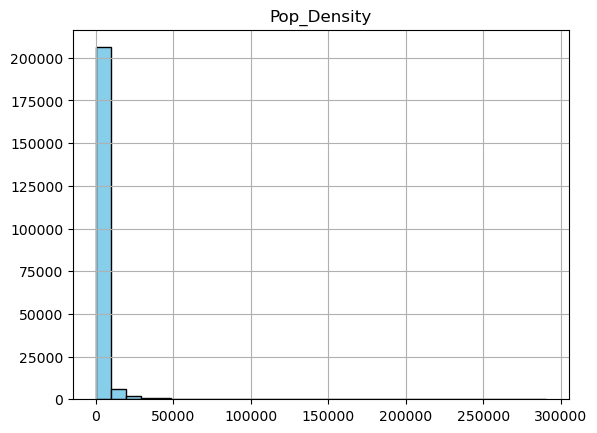

In [78]:
edagdf.hist('Pop_Density', color='skyblue', edgecolor='black', bins=30)

In [56]:
edagdf['PopDenOutlier'] = ((edagdf['Pop_Density'] < lowerbound) | (edagdf['Pop_Density'] > upperbound))

In [59]:
edagdf['PopDenOutlier'] = edagdf['PopDenOutlier'].astype(int)

<Axes: >

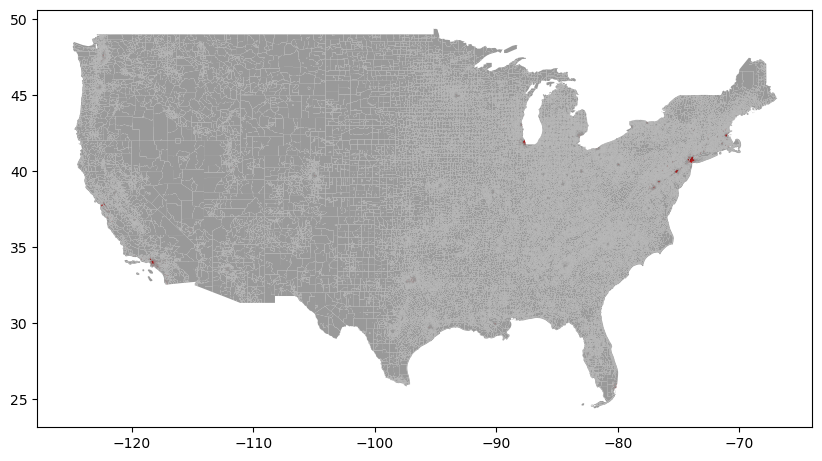

In [82]:
fig, ax1 = plt.subplots(figsize=(10,10))
edagdf.plot(column='PopDenOutlier', ax=ax1, cmap='Set1_r')

In [ ]:
# closer look at 4 walkability index variables and how they correlate with tes and temp

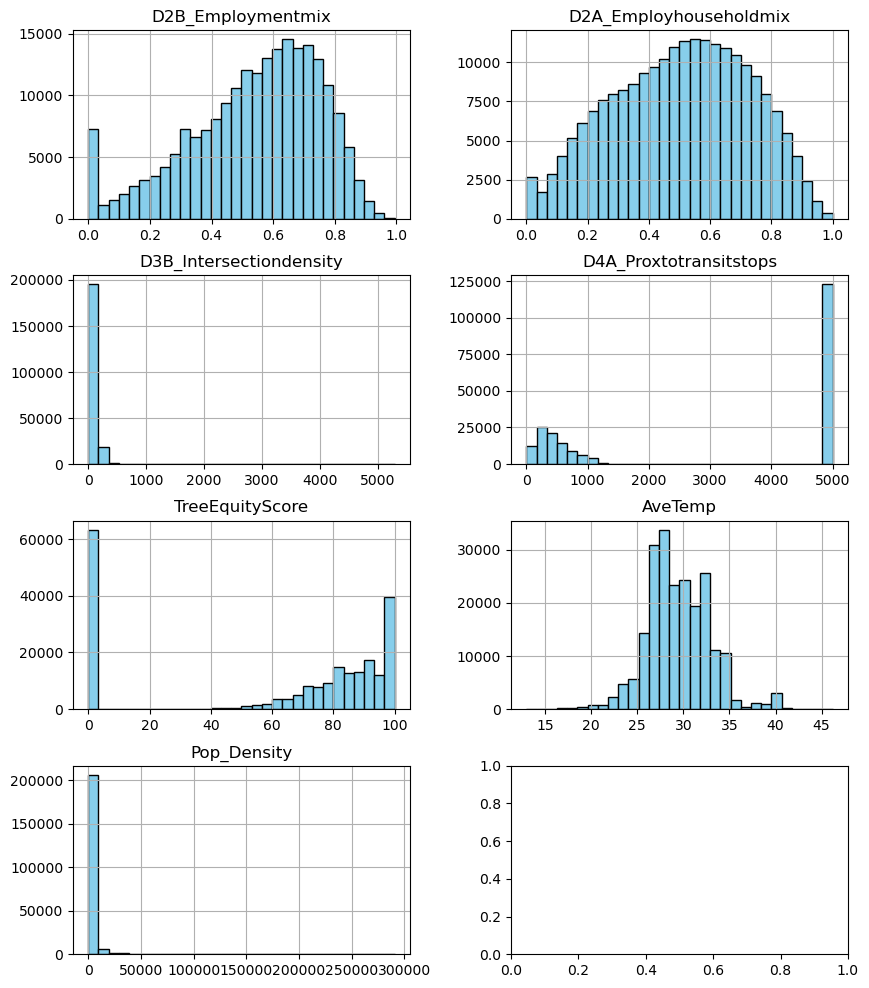

In [74]:
# histograms
fig, ax1 = plt.subplots(4, 2, figsize=(10, 12))
col = ['D2B_Employmentmix', 'D2A_Employhouseholdmix', 'D3B_Intersectiondensity', 'D4A_Proxtotransitstops', 'TreeEquityScore', 'AveTemp', 'Pop_Density']

for i, ax in zip(col, ax1.ravel()):
   edagdf.hist(i, bins=30, ax=ax, color='skyblue', edgecolor='black')
